In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
smd_data = np.loadtxt("helix_smd_pull_4_11_repeat.colvar.txt")
print(smd_data)

[[ 0.000000e+00 -1.746302e+00  6.623330e-01 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 5.000000e-01 -3.028900e-02  5.260010e-01 ...  5.492950e-01
   1.000000e+01  5.492950e-01]
 [ 1.000000e+00  9.051260e-01  3.276180e-01 ...  1.259850e+00
   2.000000e+01  1.259850e+00]
 ...
 [ 4.999900e+04 -2.089580e-01  4.844620e-01 ...  6.359352e+00
   1.000000e+03  6.359352e+00]
 [ 4.999950e+04  1.248770e+00 -6.091670e-01 ...  6.356111e+00
   1.000000e+03  6.356111e+00]
 [ 5.000000e+04 -8.881780e-01  9.458130e-01 ...  6.359214e+00
   1.000000e+03  6.359214e+00]]


/home/gmh4/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gmh4/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


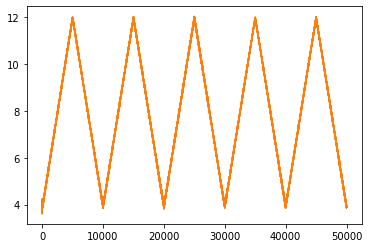

In [3]:
plt.plot(smd_data[:,0],smd_data[:,-4])
plt.plot(smd_data[:,0],smd_data[:,10])

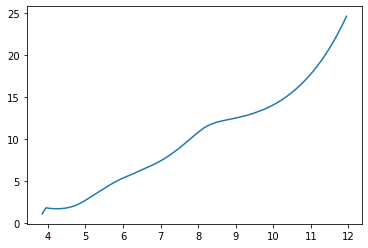

In [4]:
dx = 0.1
beta = 1./2.479
bins=np.arange(3.5,12,dx)
est_data = []
for bin in bins:
    tmp_data = smd_data[np.where((smd_data[:,-4]>bin) * (smd_data[:,-4]<bin+dx))[0]]
    if len(tmp_data)==0: continue
    avg_work = tmp_data[:,-1].mean()
    var_work = tmp_data[:,-1].var()
    fes = avg_work - 0.5*beta*var_work
    est_data.append( ( bin+dx/2, fes ) )

est_data = np.array(est_data)
plt.plot(est_data[:,0],est_data[:,1]*beta)

[-1.746302  0.662333  0.99729   0.914981  0.472223  0.882586  0.471032
  0.689417 -0.146058]


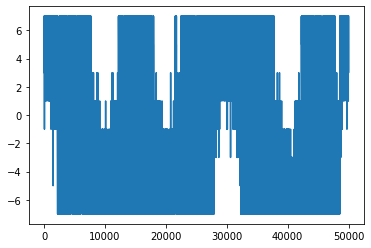

In [5]:
print(smd_data[0,1:10])
helicity = np.sign(smd_data[:,2:9]).sum(axis=1)
plt.plot(smd_data[:,0],helicity)

[1. 1. 1. 1. 1. 1. 1.]
[-8. -6. -4. -2.  0.  2.  4.  6.  8.]
-7.0
-6.0
-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


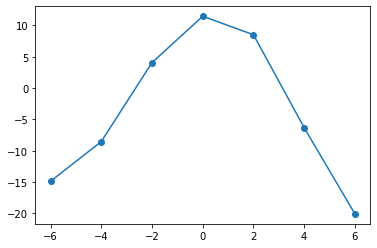

In [6]:
dh = 1.0
beta = 1./2.479
h_bins=np.arange(-7.5,7.5,dh)
helicity = np.sign(smd_data[:,2:10]).sum(axis=1)
print(np.sign(smd_data[0,2:9]))
print(np.unique(helicity))

est_data_h = []
for bin in h_bins:
    tmp_data = smd_data[np.where((helicity>bin) * (helicity<bin+dh))[0]]
    print(bin+dh/2)
    if len(tmp_data)==0: continue
    avg_work = tmp_data[:,-1].mean()
    var_work = tmp_data[:,-1].var()
    fes_h = avg_work - 0.5*beta*var_work
    est_data_h.append( ( bin+dh/2, fes_h ) )

est_data_h = np.array(est_data_h)
plt.plot(est_data_h[:,0],est_data_h[:,1],marker='o')

In [35]:
import mdtraj as md
helix_fisst = md.load("helix_fisst_example.dcd",top="helix.pdb")
helix_smd = md.load("helix_smd_cycles.dcd",top="helix.pdb")
helix_sf = md.load("helix_sf_pull0.dcd",top="helix.pdb")


helix_left = md.load("helix_left.xyz",top="helix.pdb")
helix_right = md.load("helix_right.xyz",top="helix.pdb")

left_rmsd_fisst = md.rmsd(helix_fisst, helix_left)
right_rmsd_fisst = md.rmsd(helix_fisst, helix_right)

left_rmsd_smd = md.rmsd(helix_smd, helix_left)
right_rmsd_smd = md.rmsd(helix_smd, helix_right)

left_rmsd_sf = md.rmsd(helix_sf, helix_left)
right_rmsd_sf = md.rmsd(helix_sf, helix_right)



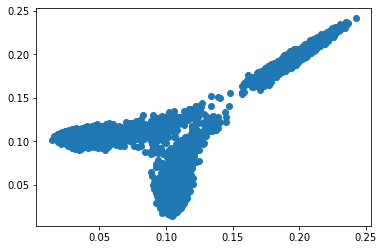

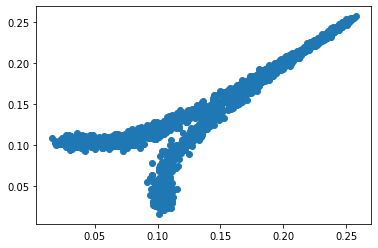

In [36]:
plt.scatter(left_rmsd_fisst,right_rmsd_fisst)
plt.figure()
plt.scatter(left_rmsd_smd,right_rmsd_smd)


In [37]:
fisst_cv_data = np.loadtxt("helix_fisst_fmin-2.0_fmax8.0_eps7.5_50000000.en.colvar.txt")
fisst_observable_data = np.loadtxt("helix_fisst_fmin-2.0_fmax8.0_eps7.5_50000000.observable.txt")
fisst_restart_data = np.loadtxt("helix_fisst_fmin-2.0_fmax8.0_eps7.5_50000000.restart.txt")

In [38]:
!ls helix_sf*
sf_cv_data = np.loadtxt("helix_sf_f-4.5_eps7.5_10000000.en.colvars.dat")

helix_sf_example.dcd
helix_sf_example.lammpstrj
helix_sf_example.log
helix_sf_f-4.5_eps7.5_10000000.en.colvars.dat
helix_sf_f-4.5_eps7.5_10000000.plumed.dat
helix_sf_f0.0_eps7.5_10000000.en.colvars.dat
helix_sf_f0_eps7.5_10000000.plumed.dat
helix_sf_pull0.dcd
helix_sf_pull0.lammpstrj


In [45]:
def new_helicity(left_rmsd,right_rmsd, cutoff=0.15):
    in_left_helix = np.where( (left_rmsd<right_rmsd)*(left_rmsd<0.15))[0]
    in_right_helix = np.where( (left_rmsd>right_rmsd)*(right_rmsd<0.15))[0]
    helicity = np.zeros(len(left_rmsd))
    helicity[in_left_helix] = left_rmsd[in_left_helix]-cutoff
    helicity[in_right_helix] = cutoff-right_rmsd[in_right_helix]
    return helicity

new_helicity_smd = new_helicity(left_rmsd_smd,right_rmsd_smd)
new_helicity_fisst = new_helicity(left_rmsd_fisst,right_rmsd_fisst)
new_helicity_sf = new_helicity(left_rmsd_sf, right_rmsd_sf)
#plt.scatter(new_helicity_smd,smd_data[::50,-4])  

print(new_helicity_fisst.shape)
print(fisst_cv_data.shape)

print(new_helicity_sf.shape)
print(sf_cv_data.shape)

#plt.figure()
#plt.scatter(new_helicity_fisst,fisst_cv_data[:,-6])  
#$plt.scatter(new_helicity_sf,sf_cv_data[:,1])  

#plt.scatter(left_rmsd_smd,helicity[::50])
#print(left_rmsd_smd.shape)
#print(helicity[::50].shape)

(10001,)
(10001, 16)
(941,)
(3241, 5)


In [46]:
print(fisst_cv_data.shape)
print(new_helicity_fisst.shape)

(10001, 16)
(10001,)


In [47]:
force_list = fisst_observable_data[0,6::2]
print(force_list)
observable_weights = fisst_observable_data[:,5::2]
print(len(observable_weights))
print(len(new_helicity_fisst[:-1]))

[-1.971306  -1.92958   -1.869517  -1.791339  -1.695338  -1.581869
 -1.451356  -1.304284  -1.141199  -0.9627086 -0.7694768 -0.5622223
 -0.3417161 -0.1087785  0.1357239  0.3908817  0.6557455  0.9293301
  1.210618   1.498562   1.792092   2.090115   2.391523   2.695194
  3.         3.304806   3.608477   3.909885   4.207908   4.501438
  4.789382   5.07067    5.344255   5.609118   5.864276   6.108779
  6.341716   6.562222   6.769477   6.962709   7.141199   7.304284
  7.451356   7.581869   7.695338   7.791339   7.869517   7.92958
  7.971306   7.99455  ]
50001
10000


[-1.35914236e-01 -1.22318311e-01 -1.08722386e-01 -9.51264605e-02
 -8.15305352e-02 -6.79346099e-02 -5.43386847e-02 -4.07427594e-02
 -2.71468341e-02 -1.35509089e-02  4.50164080e-05  1.36409417e-02
  2.72368670e-02  4.08327922e-02  5.44287175e-02  6.80246428e-02
  8.16205680e-02  9.52164933e-02  1.08812419e-01  1.22408344e-01
  1.36004269e-01]
[ 1.814618    2.30527925  2.7959405   3.28660175  3.777263    4.26792425
  4.7585855   5.24924675  5.739908    6.23056925  6.7212305   7.21189175
  7.702553    8.19321425  8.6838755   9.17453675  9.665198   10.15585925
 10.6465205  11.13718175 11.627843  ]


<ipython-input-50-5c0911e61791>:3: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(results[0].T)


Text(0, 0.5, 'End end distance')

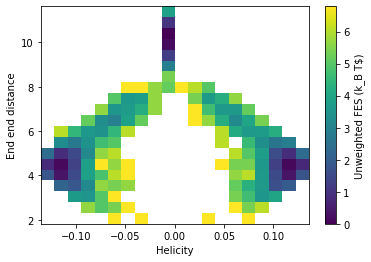

In [50]:
results = np.histogram2d(new_helicity_fisst,fisst_cv_data[:,-6],density=True,bins=(20,20))
#weights=observable_weights[::5,9]
fes = -np.log(results[0].T)
fes-=fes.min()
print(results[1])
print(results[2])
plt.imshow(fes,origin='lower', \
           extent=(results[1].min(),results[1].max(),results[2].min(),results[2].max()),
           aspect='auto')
plt.colorbar(label="Unweighted FES (k_B T$)")
plt.xlabel("Helicity")
plt.ylabel("End end distance")


In [49]:
def compute_observable_weights(restart_data,F=0,beta=1):
    observable_weights = []
    Q = restart_data[:,2]
    f_values = restart_data[:,3::4]
    g_values = restart_data[:,4::4]
    w_values = restart_data[:,5::4]
    z_values = restart_data[:,6::4]
    numerator=f_values.max()-f_values.min()

    for i in range(len(Q)):
        C = np.sum(z_values[i,:]*w_values[i,:]*g_values[i,:])
        Zf = C*np.exp(beta*F*Q[i])/np.sum(g_values[i,:]*w_values[i,:]*np.exp(beta*f_values[i,:]*Q[i]))
        ow = numerator/(Zf*np.sum(g_values[i]*w_values[i]*np.exp(beta*(f_values[i,:]-F)*Q[i])))
        print(Q[i],Zf,z_values[i,0],ow)
        if i == 10: break
    #for i in range(len(g_values)):
    #    denominator = z
compute_observable_weights(fisst_restart_data,F=-1.985437e+00)

3.910154 4.318581372755371e-15 10.0 0.9989099940065422
5.230774 4.0635533561945977e-07 0.01926823 12.877689367574172
4.913862 5.17485840241681e-05 0.009665603 27.02348266056114
2.996092 0.18278074823363413 0.03562474 9.64300333902263
5.267986 3.2136097993962095e-06 0.0381786 7.784004358888511
5.14438 1.0396347383131385e-05 0.03056965 9.754823791635273
4.393195 0.001861353865749816 0.02568423 11.628218174635998
4.488951 0.0011416958879624968 0.02404219 12.280765456121134
4.835784 0.0001329351331475532 0.02105305 13.99027245311201
4.266804 0.004154834051636957 0.01879043 15.705669060585867
3.225211 0.10026128838504923 0.0237249 12.846070028557108
